# Primera exploracion en Machine Learning

Vamos a construir una forma simple de sistema de reconocimiento de objetos. Para ello utilizaremos un dataser de ejemplo para entrenar nuestro programa que consiste de diferentes tipos de frutas. Cada fruta cuenta con ciertas caracteristicas como peso, color, dimensiones, texturas, etc, que servirán de input en nuestro programa.
Podemos pensar en el input como una tabla de datos, donde cada objeto (la fruta) es representada por una fila y los atributos del objeto (tamaño, color, textura) son representados por los valores a traves de las columnas.

In [1]:
#Librerias que debemos importar
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Cargamos el dataset que usaremos para entrenar nuestro programa
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
#Podemos ver las dimensiones del DF. 59 filas y 7 columnas
fruits.shape

(59, 7)

In [9]:
#¿cuantas frutas tenemos? tenemos 4 tipos de fruta
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

Nuestro objetivo es construir in clasificador para este conjunto de datos que sea capaz de predecir el tipo de fruta correcto para algún input que le demos.

Un punto importante que debemos tener en cuenta. SUpongamos que ya contamos con nuestro calsificador listo. ¿Como nos aseguramos que las predicciones que haga estan bien hechas?. Una alternativa sería tomar algunos datos de la muestra que usamos para entrenar el programa y compararla con la predicción hecha. Sin embargo, este prodecimiento no es del todo correcto, ya que estaríamos verificando la eficiencia del programa con datos ya utilizados para entrenarlo haciendo que la verificación no fuera válida. Queremos que nuestro programa sea capaz de predecir de manera correcta cualquier input que le pongamos en el futuro y que sea distinto del input de entrenamiento. Por lo tanto, si queremos testear la eficiencia del programa lo que debemos hacer es separar el dataset de entrenamiento en 2 partes, una para entrenar el programa (training set) y otra para verificar que la predicción está bien hecha (test set). Para hacer esto usaremos una función de scikit-learn llamada train_test_split.

# Create a train-test split

In [23]:
X = fruits[['height', 'width', 'mass', 'color_score']] #caracteristicas de la fruta
y = fruits['fruit_label'] #nombre de la fruta

#Usamos train_test_split. El flag teat_size: indica que % de los datos se va a train y
# que % se va a test. Por defecto test_size=None que significa 25% para test
# random_state proporciona la semilla para la funcion interna de numeros aleatoreos. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.25)

In [24]:
print('{:.2f}% de los datos X son para entrenar y {:.2f}% de X son para test'.format(len(X_train)/len(X), len(X_test)/len(X)))
print('{:.2f}% de los datos y son para entrenar y {:.2f}% de y son para test'.format(len(y_train)/len(y), len(y_test)/len(y)))

0.75% de los datos X son para entrenar y 0.25% de X son para test
0.75% de los datos y son para entrenar y 0.25% de y son para test


# Examinando los datos

Antes de ponerse a trabajar con Machine Learning siempre es bueno merar los datos. Ya sea con algun gráfico, tabla resumen o simplemente a mano mirando cada fila. La razones para hacer esto son variadas:

a) Te da una visión de qué es lo que hay en el data set
b) Puedes notar si hay datos faltantes, inconsistencia en los datos,      tipos de variables mal usada, mal uso de las unidades, etc.
c) Quizás te des cuenta que tu problema se puede resolver sin usar        machine learning.

<IPython.core.display.Javascript object>


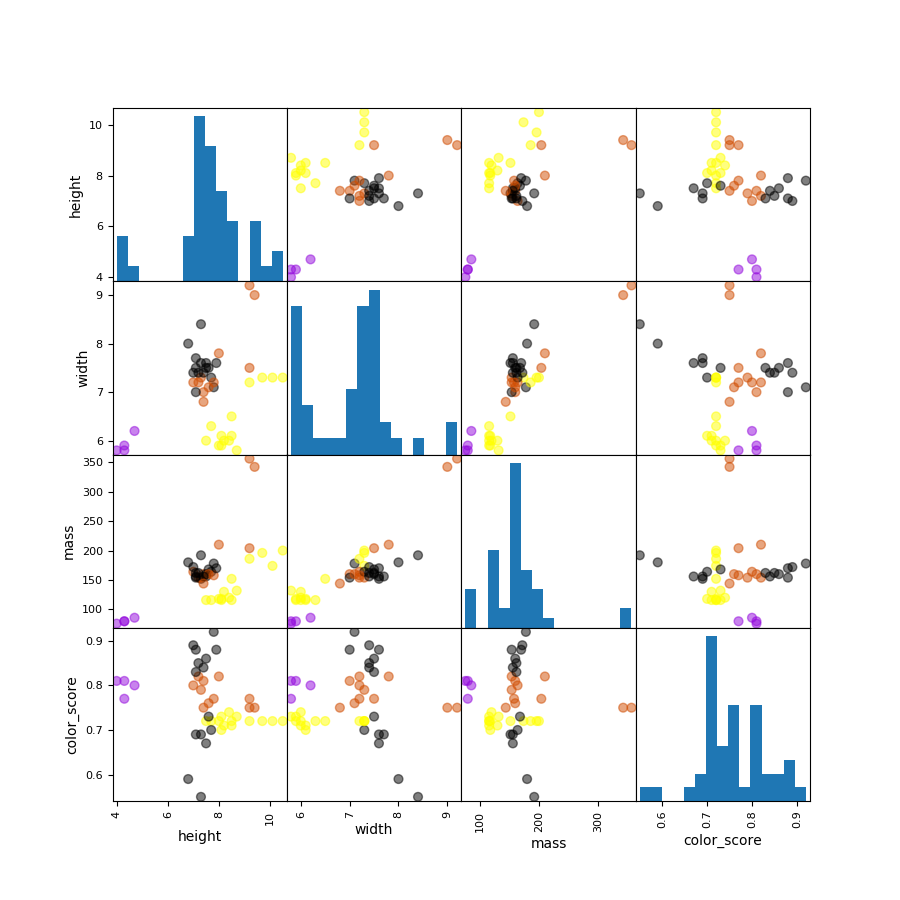

In [26]:
#Hagamos un grafico para ver si nuestros datos presentan algun dato extraño que 
# contribuya a generar ruido más adelante o si existe algun tipo de patron que nos ayude 
# a escoger mejor el tipo de clasificaros que vamos a usar.
#Para graficar los datos usaremos un scatter matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


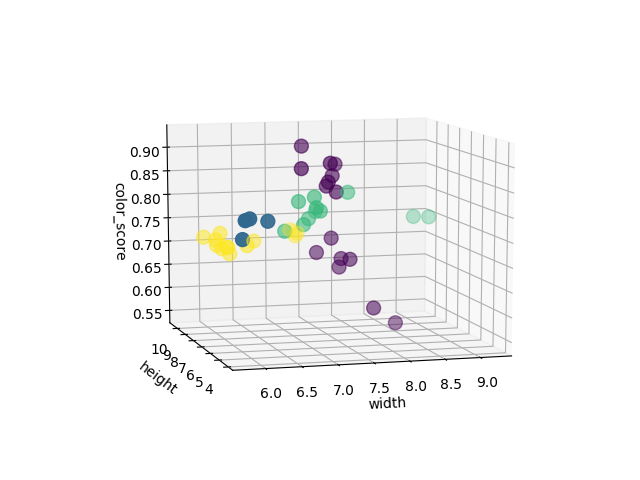

In [27]:
#Tambien podemos hacer un scatter plot en 3D considerando 3 variables contenidas en X_train
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()